In [159]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [160]:
#uploading our dataset
ondata=pd.read_excel('/content/Online Retail.xlsx')
ondata

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [161]:
#doing a .head function
ondata.tail(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541859,581580,37500,TEA TIME TEAPOT IN GIFT BOX,1,2011-12-09 12:20:00,4.95,12748.0,United Kingdom
541860,581581,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,6,2011-12-09 12:20:00,2.89,17581.0,United Kingdom
541861,581581,23561,SET OF 6 RIBBONS PARTY,6,2011-12-09 12:20:00,2.89,17581.0,United Kingdom
541862,581581,23681,LUNCH BAG RED VINTAGE DOILY,10,2011-12-09 12:20:00,1.65,17581.0,United Kingdom
541863,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,2011-12-09 12:21:00,2.08,17581.0,United Kingdom
541864,581582,23498,CLASSIC BICYCLE CLIPS,12,2011-12-09 12:21:00,1.45,17581.0,United Kingdom
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom
541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2011-12-09 12:23:00,1.85,13777.0,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom
541868,581584,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,48,2011-12-09 12:25:00,1.85,13777.0,United Kingdom


In [290]:
#doing a .info function
ondata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399707 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      399707 non-null  object        
 1   StockCode      399707 non-null  object        
 2   Description    399707 non-null  object        
 3   Quantity       399707 non-null  int64         
 4   InvoiceDate    399707 non-null  datetime64[ns]
 5   UnitPrice      399707 non-null  float64       
 6   CustomerID     399707 non-null  float64       
 7   Country        399707 non-null  object        
 8   invoice month  399707 non-null  int32         
 9   invoice Day    399707 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(5)
memory usage: 32.0+ MB


In [291]:
# doing a .shape
ondata.shape

(399707, 10)

In [292]:
#finding the number of entries in the dataset
len(ondata)

399707

In [293]:
#finding the number of features in the dataset
len(ondata.columns)

10

In [294]:
#doing a .describe function
ondata.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,invoice month
count,399707.000000,399707,399707.000000,399707.000000,399707.000000
mean,12.194242,2011-07-10 12:11:28.817058048,2.921030,15288.513529,7.595952
min,-80995.000000,2010-12-01 08:26:00,0.030000,12346.000000,1.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13959.000000,5.000000
50%,5.000000,2011-07-29 15:51:00,1.950000,15152.000000,8.000000
75%,12.000000,2011-10-20 12:03:00,3.750000,16791.000000,11.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000,12.000000
std,250.046442,NaN,4.534792,1710.605501,3.417537


the .describe function give us a summary analysis of the features of our dataset that are numerical in nature.the count gives us a summation of the entire enrties in our dataset,helping us to find out the total number of entries in each feature and finding if there are missing entries in a feature. Also the mean give us the average of each feature whereas  the min give us the minimum vulues of each features.The percentiles, gives us the percentatile ranges of each of the features while the max give us the maximum numbers in the various features.The std shows us how far or close our entries are to the mean and per the output in the various features we realise that the std values are far away from the mean indicating that there are outliers in our dataset.             

In [295]:
#checking for enty entries
ondata.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
invoice month,0
invoice Day,0


<Axes: >

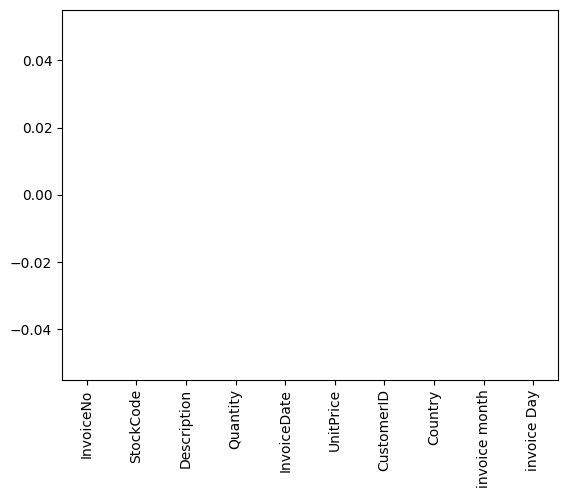

In [296]:
#visualizing the empty entries with a bar graph
ondata.isnull().sum().plot(kind='bar')

In [297]:
#removing misssing values from Description
ondata.dropna(subset=['Description'],inplace=True)
ondata.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
invoice month,0
invoice Day,0


<Axes: >

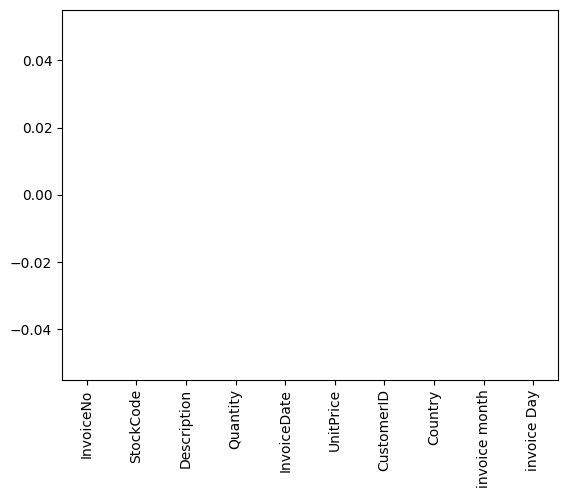

In [298]:
ondata.isna().sum().plot(kind='bar')

In [299]:
#dropping missing values customerid
ondata.dropna(subset=['CustomerID'],inplace=True)
ondata.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
invoice month,0
invoice Day,0


In [300]:
#checking for duplicated data
ondata.duplicated().sum()

np.int64(0)

In [301]:
#removing duplicated rows
ondata.drop_duplicates(inplace=True)

In [302]:
#checking for duplicate after removing them
ondata.duplicated().sum()

np.int64(0)

In [303]:
#finding the unique categorical viriables
ondata['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [304]:
ondata['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [305]:
#checking for cancelled transaction and assign a variable to it
cantnx=ondata[ondata['InvoiceNo'].str.contains('C',na=False)]
cantnx

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,12,Wednesday
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,12,Wednesday
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,Wednesday
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,Wednesday
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,12,Friday
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,12,Friday
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,12,Friday
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,12,Friday


In [306]:
#.describe on cancelled transaction
cantnx.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,invoice month
count,8506.000000,8506,8506.000000,8506.000000,8506.000000
mean,-31.473195,2011-06-27 00:26:03.943099136,4.444263,14995.144957,7.313779
min,-80995.000000,2010-12-01 09:49:00,0.030000,12346.000000,1.000000
25%,-6.000000,2011-03-21 16:25:30,1.450000,13523.000000,4.000000
50%,-2.000000,2011-07-11 13:07:00,2.550000,14901.500000,8.000000
75%,-1.000000,2011-10-06 20:38:00,4.950000,16393.000000,10.000000
max,-1.000000,2011-12-09 11:58:00,295.000000,18282.000000,12.000000
std,1197.051599,NaN,9.211683,1705.791635,3.522858


according to our analysis, the count gives us the summation of all cancelled transactions in the entire dataset, the total number of cancelled transaction is 8827 whcih account to approximately 2% of our dataset. the mean gives us the average  of the number of times a transaction was cancelled. whereas the min is the minimum numbers in our cancelled transaction.Moreover the percentiles gives us the various percentile ranges of the cancelled transactions.Max shows the maximum number of time a transaction was cancelled.the std indicates how cancelled transactions are far or closer to the mean.        

In [307]:
len(ondata)


399707

In [308]:
#percentage of the cancelled transaction
(len(cantnx)/len(ondata))*100
#8872/401604*100

2.128058803073251

In [309]:
#find the unique values in the stock code column
scode=ondata['StockCode'].value_counts().index.unique()
#scode.unique() by
scode


Index(['85123A',    22423, '85099B',    47566,    84879,    20725,    22720,
          22197,    23203,    20727,
       ...
       '17028J', '84795C', '90197B', '90025F',    47579, '90162A', '90214W',
       '90214Z', '90130A',    22125],
      dtype='object', name='StockCode', length=3675)

In [310]:
#listing all the unique scode
scode=ondata['StockCode'].unique()
len(scode)

3675

In [311]:
#Finding the stock code with the highest quantity
scode= ondata['StockCode'].value_counts()
scode.idxmax()


'85123A'

In [312]:
#selecting scode of our dataset
scode=ondata[ondata['StockCode']=='85123A']
scode

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,12,Wednesday
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,12,Wednesday
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,12,Wednesday
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...
538708,581412,85123A,CREAM HANGING HEART T-LIGHT HOLDER,4,2011-12-08 14:38:00,2.95,14415.0,United Kingdom,12,Thursday
539083,581432,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2011-12-08 15:51:00,2.55,13798.0,United Kingdom,12,Thursday
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-12-08 18:03:00,2.55,17675.0,United Kingdom,12,Thursday
540217,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-08 19:55:00,2.95,15796.0,United Kingdom,12,Thursday


according to the table above we realise that the product with the hieghest stockcode whcih has it coresponding product to be WHITE HANGING HEART T-LIGHT HOLDER has the highest purchases amoung all the purchases made.Hence in order to improve business revenue we should have more WHITE HANGING HEART T-LIGHT HOLDER	product in stocks and make sure we dont run out stocks

In [313]:
#finding the top 10 product
top_10=ondata['StockCode'].value_counts(normalize=True).head(10)*100
top_10


,proportion
StockCode,
85123A,0.516628
22423,0.473597
85099B,0.415054
47566,0.352258
84879,0.351507
20725,0.336747
22720,0.306224
22197,0.277703
23203,0.277203


In [314]:
#top 10 product with the highest frequency
top_10=ondata['StockCode'].value_counts()
top_10

,count
StockCode,
85123A,2065
22423,1893
85099B,1659
47566,1408
84879,1405
...,...
90162A,1
90214W,1
90214Z,1


In [315]:
#finding the products with the highest frequency against it description
top_10=ondata['Description'].value_counts().head(10)
top_10



,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2058
REGENCY CAKESTAND 3 TIER,1893
JUMBO BAG RED RETROSPOT,1659
PARTY BUNTING,1408
ASSORTED COLOUR BIRD ORNAMENT,1405
LUNCH BAG RED RETROSPOT,1345
SET OF 3 CAKE TINS PANTRY DESIGN,1224
LUNCH BAG BLACK SKULL.,1099
PACK OF 72 RETROSPOT CAKE CASES,1062


In [316]:
#SELECTING POST
post=ondata[ondata['StockCode']=='POST'].value_counts().head(10)
post

,,,,,,,,,,count
InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day,


In [376]:
#selecting the product description of post
post=ondata[ondata['StockCode']=='POST']
post

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day


<function matplotlib.pyplot.show(close=None, block=None)>

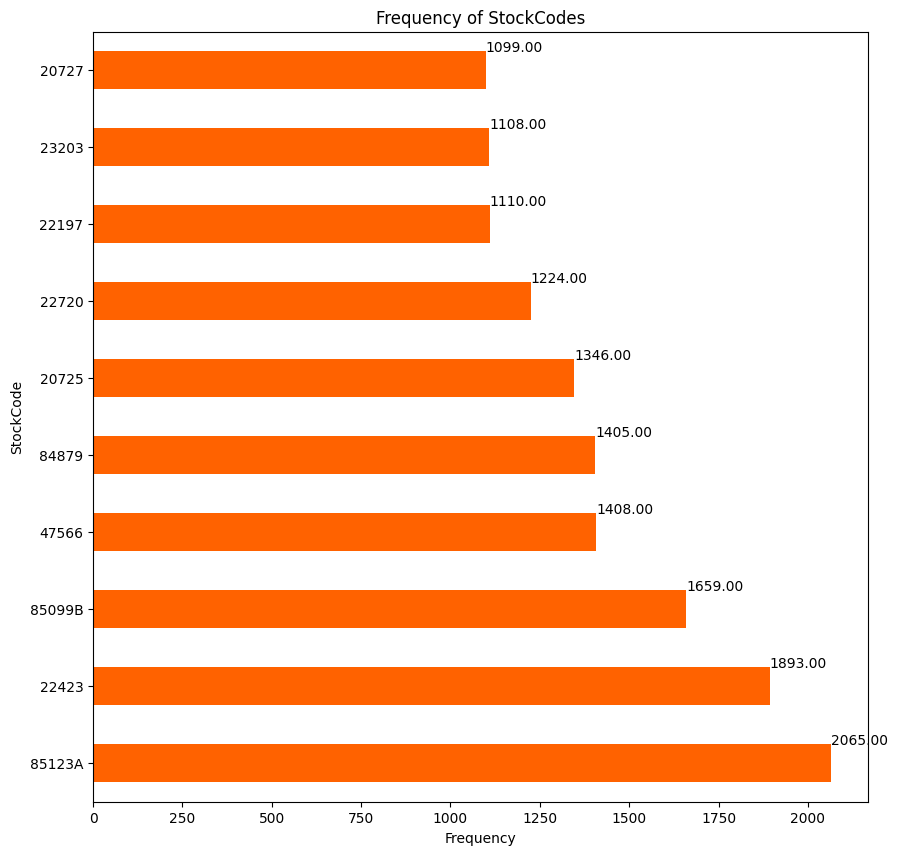

In [318]:
#visualizing top_10

import plotly.graph_objects as go
from tabulate import tabulate
top_10=ondata['StockCode'].value_counts().head(10)



plt.figure(figsize=(10, 10))
top_10.plot(kind='barh', color= '#ff6200')

for index, value in enumerate(top_10):
  plt.text(value, index+0.25, f'{value:.2f}', fontsize=10)#come back

plt.title('Frequency of StockCodes')
plt.xlabel('Frequency')
plt.ylabel('StockCode')
#plt.gca().invert_yaxis()
plt.show

come back.

<function matplotlib.pyplot.show(close=None, block=None)>

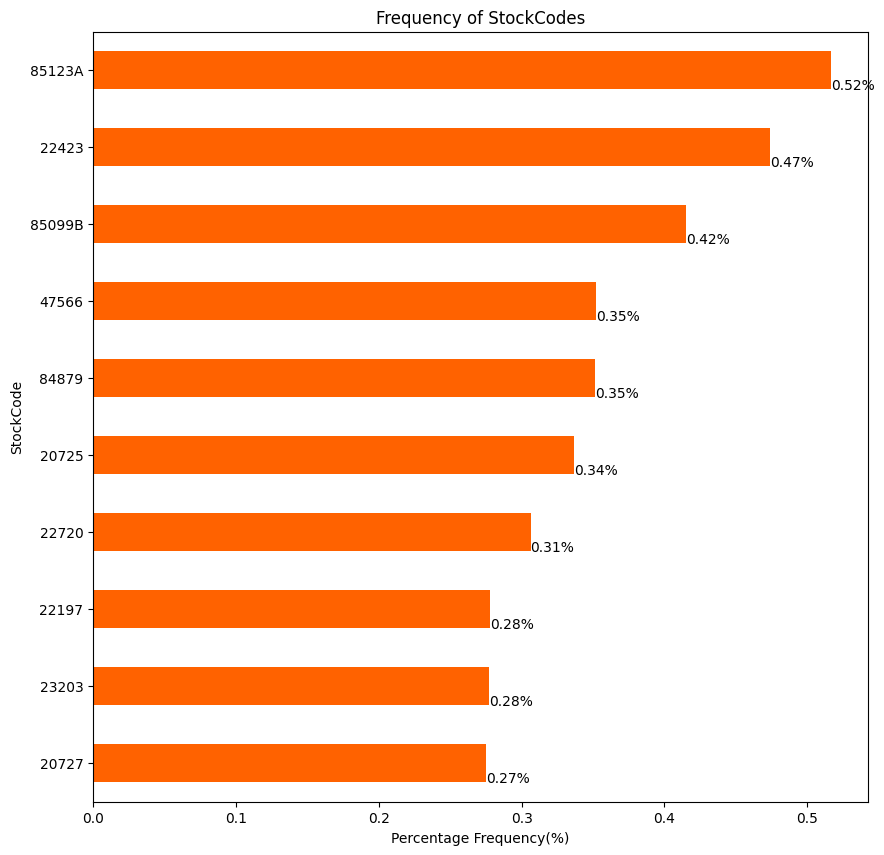

In [319]:
import plotly.graph_objects as go
from tabulate import tabulate

top_10  = ondata['StockCode'].value_counts(normalize=True).head(10) *100
top_10


plt.figure(figsize=(10, 10))
top_10.plot(kind='barh', color= '#ff6200')

for index, value in enumerate(top_10):
  plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Frequency of StockCodes')
plt.xlabel('Percentage Frequency(%)')
plt.ylabel('StockCode')
plt.gca().invert_yaxis()
plt.show

In [320]:
#finding the country with the most entries
ondata['Country'].value_counts()

,count
Country,
United Kingdom,356038
Germany,9079
France,8154
EIRE,7467
Spain,2462
Netherlands,2326
Belgium,1971
Switzerland,1843
Portugal,1427


In [321]:
#go into uk and look at the stock codes finding the product which are bought. find which product are unspecified
#extract date from the date column


In [322]:
#outputting all uk transactions
uk=ondata[ondata['Country']=='United Kingdom']
uk


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,12,Friday
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,12,Friday
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,12,Friday
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,12,Friday


In [323]:
#outputting product bought
uk[['StockCode','Description'] ]

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
541889,22466,FAIRY TALE COTTAGE NIGHT LIGHT
541890,22061,LARGE CAKE STAND HANGING STRAWBERY
541891,23275,SET OF 3 HANGING OWLS OLLIE BEAK
541892,21217,RED RETROSPOT ROUND CAKE TINS


In [324]:
#finding the product with the highest frequency
uk.mode()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
0,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-11-14 15:27:00,1.25,17841.0,United Kingdom,11,Thursday


In [325]:
#finding the product with the highest frequency
uk[['StockCode','Description']].value_counts()

,,count
StockCode,Description,
85123A,WHITE HANGING HEART T-LIGHT HOLDER,1969
22423,REGENCY CAKESTAND 3 TIER,1564
85099B,JUMBO BAG RED RETROSPOT,1502
84879,ASSORTED COLOUR BIRD ORNAMENT,1330
47566,PARTY BUNTING,1319
...,...,...
90187B,GREEN DROP EARRINGS W BEAD CLUSTER,1
90214O,"LETTER ""O"" BLING KEY RING",1
90190A,SILVER/CRYSTAL DROP EARRINGS W LEAF,1


In [326]:
#finding unspecified product
unsp=ondata[ondata['Country']=='Unspecified']
unsp

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
152712,549687,20685,DOORMAT RED RETROSPOT,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified,4,Monday
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified,4,Monday
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified,4,Monday
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified,4,Monday
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified,4,Monday
...,...,...,...,...,...,...,...,...,...,...
308810,564051,23007,SPACEBOY BABY GIFT SET,1,2011-08-22 13:32:00,16.95,14265.0,Unspecified,8,Monday
308811,564051,21833,CAMOUFLAGE LED TORCH,12,2011-08-22 13:32:00,1.69,14265.0,Unspecified,8,Monday
308812,564051,23081,GREEN METAL BOX ARMY SUPPLIES,2,2011-08-22 13:32:00,8.25,14265.0,Unspecified,8,Monday
308813,564051,23046,PAPER LANTERN 9 POINT DELUXE STAR,2,2011-08-22 13:32:00,6.65,14265.0,Unspecified,8,Monday


In [327]:
#finding unspecified product
unsp[['StockCode','Description','Country']].value_counts()

,,,count
StockCode,Description,Country,
23108,SET OF 10 LED DOLLY LIGHTS,Unspecified,3
84879,ASSORTED COLOUR BIRD ORNAMENT,Unspecified,3
22585,PACK OF 6 BIRDY GIFT TAGS,Unspecified,2
21065,BOOM BOX SPEAKER GIRLS,Unspecified,2
20679,EDWARDIAN PARASOL RED,Unspecified,2
...,...,...,...
85049A,TRADITIONAL CHRISTMAS RIBBONS,Unspecified,1
85179A,GREEN BITTY LIGHT CHAIN,Unspecified,1
85179C,PINK BITTY LIGHT CHAIN,Unspecified,1


In [328]:
#extracting date from the date cloumn
date=pd.to_datetime(ondata['InvoiceDate']).dt.month #pd.to_datetime(df['date']).dt.month
date
ondata['invoice month']=date
ondata.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,12,Friday


In [329]:
#extracting Day from the date cloumn
day=pd.to_datetime(ondata['InvoiceDate']).dt.day_name() #pd.to_datetime(df['date']).dt.month
day
ondata['invoice Day']=day
ondata.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,12,Friday


In [330]:
#
ondata['Description'].loc[:1000]

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
996,SKULLS SQUARE TISSUE BOX
997,PINK PAISLEY SQUARE TISSUE BOX
998,PACK OF 6 HANDBAG GIFT BOXES
999,TOAST ITS - HAPPY BIRTHDAY


In [331]:
low_case=ondata['Description'].unique()
low_case

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [332]:
len(low_case)

3887

In [333]:
low_case=[desc for desc in low_case if any (char.islower() for char in desc)]
low_case


['BAG 500g SWIRLY MARBLES',
 'POLYESTER FILLER PAD 45x45cm',
 'POLYESTER FILLER PAD 45x30cm',
 'POLYESTER FILLER PAD 40x40cm',
 'FRENCH BLUE METAL DOOR SIGN No',
 'BAG 250g SWIRLY MARBLES',
 'BAG 125g SWIRLY MARBLES',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 'NUMBER TILE COTTAGE GARDEN No',
 'FOLK ART GREETING CARD,pack/12',
 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
 'POLYESTER FILLER PAD 65CMx65CM',
 'NUMBER TILE VINTAGE FONT No ',
 'POLYESTER FILLER PAD 30CMx30CM',
 'POLYESTER FILLER PAD 60x40cm',
 'FLOWERS HANDBAG blue and orange',
 'THE KING GIFT BAG 25x24x12cm']

In [334]:
#dropping bank charges
ondata.drop(ondata[ondata['Description']=='Bank Charges'].index,inplace=True)
ondata.drop(ondata[ondata['Description']=='High Resolution Image'].index,inplace=True)
ondata.drop(ondata[ondata['Description']=='Next Day Carriage'].index,inplace=True)

In [335]:
low_case

['BAG 500g SWIRLY MARBLES',
 'POLYESTER FILLER PAD 45x45cm',
 'POLYESTER FILLER PAD 45x30cm',
 'POLYESTER FILLER PAD 40x40cm',
 'FRENCH BLUE METAL DOOR SIGN No',
 'BAG 250g SWIRLY MARBLES',
 'BAG 125g SWIRLY MARBLES',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 'NUMBER TILE COTTAGE GARDEN No',
 'FOLK ART GREETING CARD,pack/12',
 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
 'POLYESTER FILLER PAD 65CMx65CM',
 'NUMBER TILE VINTAGE FONT No ',
 'POLYESTER FILLER PAD 30CMx30CM',
 'POLYESTER FILLER PAD 60x40cm',
 'FLOWERS HANDBAG blue and orange',
 'THE KING GIFT BAG 25x24x12cm']

In [336]:
ondata.tail(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
541859,581580,37500,TEA TIME TEAPOT IN GIFT BOX,1,2011-12-09 12:20:00,4.95,12748.0,United Kingdom,12,Friday
541860,581581,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,6,2011-12-09 12:20:00,2.89,17581.0,United Kingdom,12,Friday
541861,581581,23561,SET OF 6 RIBBONS PARTY,6,2011-12-09 12:20:00,2.89,17581.0,United Kingdom,12,Friday
541862,581581,23681,LUNCH BAG RED VINTAGE DOILY,10,2011-12-09 12:20:00,1.65,17581.0,United Kingdom,12,Friday
541863,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,2011-12-09 12:21:00,2.08,17581.0,United Kingdom,12,Friday
541864,581582,23498,CLASSIC BICYCLE CLIPS,12,2011-12-09 12:21:00,1.45,17581.0,United Kingdom,12,Friday
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom,12,Friday
541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2011-12-09 12:23:00,1.85,13777.0,United Kingdom,12,Friday
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom,12,Friday
541868,581584,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,48,2011-12-09 12:25:00,1.85,13777.0,United Kingdom,12,Friday


In [337]:
scode=ondata[ondata['StockCode']=='BANK CHARGES']
scode

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day


In [338]:
#outputting unite price with entries equal to zero
zero_out=ondata[ondata['UnitPrice']==0]
zero_out

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day


In [339]:
scode

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day


In [341]:
#outputting outliers
out_stock = [i for i in scode if sum(char.isdigit() for char in str(i)) in (0, 1)]
print('Outlier Stockcodes.')
for i in out_stock:
   print(i)

Outlier Stockcodes.
InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country
invoice month
invoice Day


In [394]:
#finding the outliers with it product description
fdata=ondata[ondata['StockCode'].isin(('POST','M','D','CRUK','DOT','PADS'))]
mdata=fdata[['Description','StockCode']]
mdata.tail(10)

,Description,StockCode


According the output of the outliers and thier description we get to know that the outliers are not product but are some services being carried out by the shop  

In [393]:
#dropping anomalies in the dataset
ondata.drop(ondata[ondata['StockCode']=='BANK CHARGES'].index,inplace=True)
ondata.drop(ondata[ondata['StockCode']=='DOT'].index,inplace=True)
ondata.drop(ondata[ondata['StockCode']=='PADS'].index,inplace=True)
ondata.drop(ondata[ondata['StockCode']=='M'].index,inplace=True)
ondata.drop(ondata[ondata['StockCode']=='CRUK'].index,inplace=True)
ondata.drop(ondata[ondata['StockCode']=='D'].index,inplace=True)
ondata.drop(ondata[ondata['StockCode']=='POST'].index,inplace=True)
ondata.drop(ondata[ondata['UnitPrice']==0].index,inplace=True)
ondata.drop(ondata[ondata['Country']=='Unspecified'].index,inplace=True)

In [344]:
ondata

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday


In [349]:
#creating a new dataset
newdata=ondata.copy()
newdata


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday


In [365]:
#creating a new colum
newdata['TransactionStatus']=''
newdata

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day,TransactionStatus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday,
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Wednesday,
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,Friday,
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,Friday,
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday,
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday,


In [375]:
#inputting our transaction status
newdata['TransactionStatus'] = ['cancelled' if val == 'c' else 'completed' for val in newdata['InvoiceNo']]
newdata

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,invoice Day,TransactionStatus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,Wednesday,completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,Wednesday,completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,Wednesday,completed
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,Friday,completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,Friday,completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday,completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,Friday,completed


In [397]:
# visualizing 30 sample data
viz_30=ondata.head(30)
mainv=viz_30[['Description','Quantity']]
mainv

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,6
1,WHITE METAL LANTERN,6
2,CREAM CUPID HEARTS COAT HANGER,8
3,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,RED WOOLLY HOTTIE WHITE HEART.,6
5,SET 7 BABUSHKA NESTING BOXES,2
6,GLASS STAR FROSTED T-LIGHT HOLDER,6
7,HAND WARMER UNION JACK,6
8,HAND WARMER RED POLKA DOT,6
9,ASSORTED COLOUR BIRD ORNAMENT,32


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

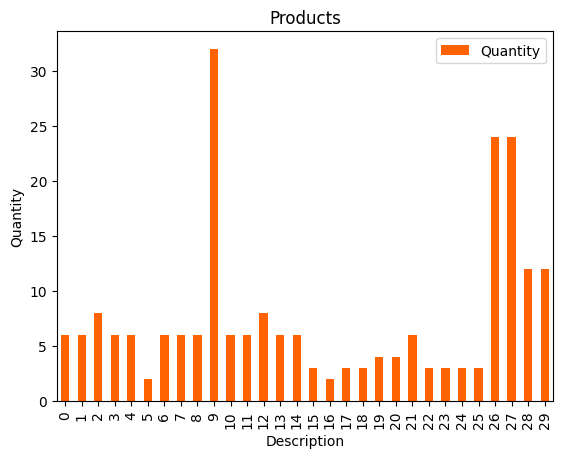

In [414]:
#visualing 30 product and their quantity
import plotly.graph_objects as go
from tabulate import tabulate

mainv=viz_30[['Description','Quantity']]


plt.figure(figsize=(10, 10))
mainv.plot(kind='bar', color= '#ff6200')



plt.title('Products')
plt.xlabel('Description')
plt.ylabel('Quantity')
#plt.gca().invert_yaxis()
plt.show